In [1]:
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils import to_categorical
(trainX,trainY),(testX,testY) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [4]:
print(trainY)
print(testY)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [5]:
x_train = trainX/255
X_test = testX/255

In [6]:
x_val = x_train[:25000]
partial_x_train = x_train[25000:]
y_val = trainY[:25000]
partial_y_train = trainY[25000:]

In [7]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
#model.add(layers.BatchNormalization())
#model.add(layers.Conv2D(128,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)            

In [8]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [9]:
history = model.fit(x_train,trainY,epochs = 30,batch_size  =60,validation_data = (x_val,y_val))


Train on 50000 samples, validate on 25000 samples
Epoch 1/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6012 - accuracy: 0.4217 - val_loss: 1.4208 - val_accuracy: 0.5036
Epoch 2/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.2403 - accuracy: 0.5611 - val_loss: 1.1333 - val_accuracy: 0.6096
Epoch 3/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.0888 - accuracy: 0.6169 - val_loss: 0.9347 - val_accuracy: 0.6804
Epoch 4/30
50000/50000 [==============================] - 60s 1ms/step - loss: 0.9996 - accuracy: 0.6513 - val_loss: 0.8460 - val_accuracy: 0.7198
Epoch 5/30
50000/50000 [==============================] - 70s 1ms/step - loss: 0.9274 - accuracy: 0.6772 - val_loss: 0.8973 - val_accuracy: 0.6872
Epoch 6/30
50000/50000 [==============================] - 72s 1ms/step - loss: 0.8696 - accuracy: 0.6991 - val_loss: 0.7858 - val_accuracy: 0.7262
Epoch 7/30
50000/50000 [==============================] - 73s 1ms/s

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
result =model.evaluate(X_test,testY)

10000/10000 [==============================] - 4s 446us/step


In [12]:
print(result)

[0.9672261478424072, 0.6927000284194946]


In [13]:
# example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

# define model input
visible = Input(shape=(x_train.shape[1:]))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 32)   2432        input_1[0][0]                    
____________________________________________________________________________________________

In [14]:
from keras import layers
from keras import models
input_tensor = Input(shape=(x_train.shape[1:]))
m = layers.Conv2D(32,(3,3),activation='relu')(input_tensor)
m = layers.MaxPooling2D((2,2))(m)
m = layers.Dropout(0.25)(m)
m = layers.Conv2D(64,(3,3),activation='relu')(m)
m = layers.MaxPooling2D((2,2))(m)
m = layers.Dropout(0.25)(m)
#m = naive_inception_module(m, 64, 128, 32)
#m = layers.Conv2D(128,(3,3),activation='relu')(m)
#m = layers.MaxPooling2D((2,2))(m)
#m = layers.Dropout(0.25)(m)
m = naive_inception_module(m, 64, 128, 32)
m = layers.Flatten()(m)
m = layers.Dense(128, activation = 'relu')(m)
m = layers.Dense(10, activation = 'softmax')(m)


In [15]:
model = Model(inputs=input_tensor, outputs=m)


In [16]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 30, 30, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 15, 15, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 15, 15, 32)   0           max_pooling2d_4[0][0]            
____________________________________________________________________________________________

In [17]:
model.layers

In [18]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [19]:
history = model.fit(x_train,trainY,epochs = 30,batch_size  =60,validation_data = (x_val,y_val))

Train on 50000 samples, validate on 25000 samples
Epoch 1/30
50000/50000 [==============================] - 102s 2ms/step - loss: 1.5763 - accuracy: 0.4329 - val_loss: 1.8766 - val_accuracy: 0.3924
Epoch 2/30
50000/50000 [==============================] - 102s 2ms/step - loss: 1.1280 - accuracy: 0.6035 - val_loss: 1.0372 - val_accuracy: 0.6382
Epoch 3/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.9711 - accuracy: 0.6606 - val_loss: 0.9447 - val_accuracy: 0.6794
Epoch 4/30
50000/50000 [==============================] - 103s 2ms/step - loss: 0.8703 - accuracy: 0.6967 - val_loss: 0.7312 - val_accuracy: 0.7501
Epoch 5/30
50000/50000 [==============================] - 105s 2ms/step - loss: 0.7919 - accuracy: 0.7228 - val_loss: 0.6856 - val_accuracy: 0.7525
Epoch 6/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.7403 - accuracy: 0.7408 - val_loss: 0.6229 - val_accuracy: 0.7804
Epoch 7/30
50000/50000 [==============================] - 102s

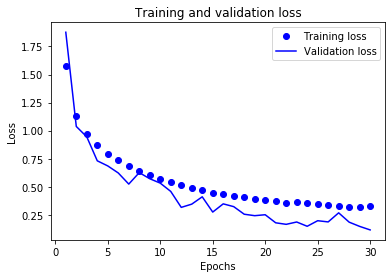

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
result =model.evaluate(X_test,testY)

10000/10000 [==============================] - 8s 775us/step


In [22]:
print(result)

[1.0767808875083924, 0.7426000237464905]


In [24]:
from keras import layers
from keras import models
input_tensor = layers.Input(shape=(x_train.shape[1:]))

m = layers.Conv2D(32,(3,3),activation='relu')(input_tensor)
m = layers.MaxPooling2D((2,2))(m)
m = layers.Dropout(0.25)(m)

m = layers.Conv2D(64,(3,3),activation='relu')(m)
m = layers.MaxPooling2D((2,2))(m)
m = layers.Dropout(0.25)(m)

m1 = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(m)
m1 = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(m)
m1 = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(m)
y=layers.add([m1,m])

m = layers.Flatten()(y)
m = layers.Dense(128, activation = 'relu')(m)
m = layers.Dense(10, activation = 'softmax')(m)

In [25]:
model = Model(inputs=input_tensor, outputs=m)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 30, 30, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 15, 15, 32)   0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 15, 15, 32)   0           max_pooling2d_9[0][0]            
____________________________________________________________________________________________

In [26]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [27]:
history = model.fit(x_train,trainY,epochs = 30,batch_size  =60,validation_data = (x_val,y_val))

Train on 50000 samples, validate on 25000 samples
Epoch 1/30
50000/50000 [==============================] - 76s 2ms/step - loss: 1.5876 - accuracy: 0.4289 - val_loss: 1.4173 - val_accuracy: 0.4827
Epoch 2/30
50000/50000 [==============================] - 45s 899us/step - loss: 1.1984 - accuracy: 0.5757 - val_loss: 1.0867 - val_accuracy: 0.6166
Epoch 3/30
50000/50000 [==============================] - 33s 664us/step - loss: 1.0425 - accuracy: 0.6333 - val_loss: 0.9985 - val_accuracy: 0.6426
Epoch 4/30
50000/50000 [==============================] - 33s 653us/step - loss: 0.9406 - accuracy: 0.6679 - val_loss: 0.8910 - val_accuracy: 0.6820
Epoch 5/30
50000/50000 [==============================] - 33s 667us/step - loss: 0.8689 - accuracy: 0.6957 - val_loss: 0.6932 - val_accuracy: 0.7610
Epoch 6/30
50000/50000 [==============================] - 33s 661us/step - loss: 0.8058 - accuracy: 0.7183 - val_loss: 0.6384 - val_accuracy: 0.7768
Epoch 7/30
50000/50000 [==============================] - 

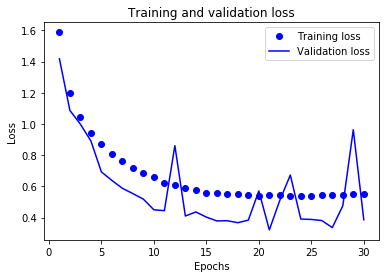

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
result =model.evaluate(X_test,testY)

10000/10000 [==============================] - 2s 201us/step


In [30]:
print(result)

[0.8636185321807861, 0.7178000211715698]
